# Combining model and VGG16 to fine tune the model 

## Import libraries

In [4]:
## libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import applications
import matplotlib.pyplot as plt

## initialization

In [5]:
model_weights = r'bottleneck_fc_model.h5'

## image dimensions
img_h, img_w = 150, 150

## epochs
epochs = 50

## batch Size
batch_size = 16

## total no of train and validation samples
nb_train_samples = 1700
nb_validation_samples = 500

## data set directory
train_data_dir = r'..\Data\train'
validation_data_dir = r'..\Data\validation'

## Model

In [6]:
## vgg16 network
model = applications.vgg16.VGG16(include_top = False, weights = 'imagenet', input_shape=(150,150,3))
print('Model loaded.')

top_model = Sequential()
top_model.add(Flatten(input_shape = model.output_shape[1:]))
top_model.add(Dense(256, activation = 'relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation = 'sigmoid'))

top_model.load_weights(model_weights)

model = Model(inputs=model.input, outputs=top_model(model.output))

for layer in model.layers[:15]:
    layer.trainable = False
    
model.compile(loss = 'binary_crossentropy', 
             optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-4, momentum = 0.9), 
             metrics = ['accuracy'])

Model loaded.


## Data Preprocessing

In [7]:
## data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.3, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

## train data
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_w, img_h),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

## validation data
validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_w, img_h),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

Found 1700 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Model Train/Validation

Epoch 1/50
107/107 [==============================] - 15s 76ms/step - loss: 0.5261 - accuracy: 0.8153 - val_loss: 0.3809 - val_accuracy: 0.8460
Epoch 2/50
107/107 [==============================] - 8s 70ms/step - loss: 0.3137 - accuracy: 0.8706 - val_loss: 0.4099 - val_accuracy: 0.8520
Epoch 3/50
107/107 [==============================] - 8s 72ms/step - loss: 0.2523 - accuracy: 0.8965 - val_loss: 0.3897 - val_accuracy: 0.8580
Epoch 4/50
107/107 [==============================] - 8s 71ms/step - loss: 0.2027 - accuracy: 0.9153 - val_loss: 0.4327 - val_accuracy: 0.8700
Epoch 5/50
107/107 [==============================] - 8s 73ms/step - loss: 0.2041 - accuracy: 0.9206 - val_loss: 0.4146 - val_accuracy: 0.8660
Epoch 6/50
107/107 [==============================] - 8s 77ms/step - loss: 0.1725 - accuracy: 0.9359 - val_loss: 0.4385 - val_accuracy: 0.8640
Epoch 7/50
107/107 [==============================] - 8s 70ms/step - loss: 0.1585 - accuracy: 0.9382 - val_loss: 0.3717 - val_accuracy: 0.856

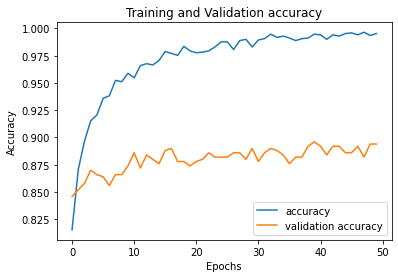

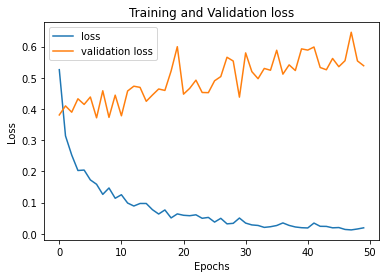

In [8]:
## training and testing model with the data set
history = model.fit(train_generator,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = validation_generator)

## plot accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.legend(['accuracy','validation accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## plot loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.legend(['loss','validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()